<a href="https://colab.research.google.com/github/PriscillaMuli/Moringa-Data-Science-Core-Week2-Independent-Project/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_03_Priscilla_Muli_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Defining the Question**

**1.1.1 Specifying the data analytical question**





The research problem is to evaluate how to predict which individuals are most likely to have or use a bank account

Provide insights into key demographic factors that might drive individual's financial outcome

Provide an indication of the financial inclusion state in Kenya, Uganda, Tanzania and Rwanda



**1.1.2 Defining the metric of success**



The metric of success will be shown by our ability to show individuals who are most likely to use a bank account or those who use a bank account. 
The following areas will be covered to achieve the objective successfully:
1. Exploratory Data Analysis
2. Univariate, Bivariate and Multivariate Analaysis
3. Visualizations
4. Reduction Techniques
5. Multiple Regression Model

**1.1.3 Understanding the context**

One of the main obstacles to economic and human development is financial inclusion. In Kenya, Tanzania, Uganda and Rwanda only 9.1 million adults (13.9% of the adult population) have access or use a commercial bank account.
Access to bank accounts has been regarded, traditionally, as an indicator of financial inclusion. Majority of African adults do not have access or use a commercial bank account.
The objective of the study is to provide an indication of the state of financial inclusion in Kenya, Tanzania, Uganda and Rwanda through prediction of which individuals are most likely to have access or use a commercial bank account.
Access to bank accounts is a vital contributor to long-term economic growth.
Banks play a pivotal role in facilitating financial service access in Africa regardless of the growth of innovative fintech solutions and proliferation of mobile money.
Advantages of access to bank accounts to households is the ability to save and facilitate payments. Other advantages include improvement of access to other financial services and helping businesses build up their credit-worthiness.

Variable Definitions/ Data Dictionary: http://bit.ly/VariableDefinitions

**1.1.4 Recording the experimental design**

The methodology that will be used to conduct this project includes the following steps:

1. Conduct Exploratory Data Analysis
2. Univariate, Bivariate and Multivariate Analaysis
3. Create Visualizations
4. Apply Reduction Techniques
5. Create a Multiple Regression Model
6. Challenge the Solution to evaluate whether it is the best for this project


**1.1.5 Data relevance**

The data provided contains crucial variables which can be used for the prediction which is the purpose of the study. Thus, the data provided fits the context of the study. The main dataset contains the financial services individuals use in East Africa and demographic information. It was extracted from various Finscope surveys ranging from 2016 to 2018. More information is provided in the following links:

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/ 

Dataset Files:

Dataset: http://bit.ly/FinancialDataset

Variable Definitions: http://bit.ly/VariableDefinitions 

**1.2  Reading the dataset and creating a dataframe for the dataset**

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#Import libraries necessary for the analysis

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

import pandas as pd

import seaborn as sns

from sklearn import model_selection

from pandas_profiling import ProfileReport

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm


In [4]:
import warnings
warnings.filterwarnings('ignore')
# don't print out warnings

In [5]:
# Load the dataset and create a dataframe

df = pd.read_csv('http://bit.ly/FinancialDataset')

Variable definitions

In [24]:
definitions_df = pd.read_csv('http://bit.ly/VariableDefinitions')
definitions_df.head(20)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Previewing the dataset

In [ ]:
# View the first 10 entries in the dataset
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
# Viewing the last 10 entries in the dataset

df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Checking the data

In [ ]:
# Determine the number of records in the dataset
print('This dataset has '+ str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [ ]:
# Checking the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Checking the columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Check if each column has a suitable datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Checking entire profile of the dataframe

profile = ProfileReport(df, title="Financial Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Saving the profile report
profile.to_file(output_file="Financial_Dataset_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Tidying the Datasets

Duplicates

In [6]:
# Check for duplicated data in the dataframe
df.duplicated().sum()

0

Drop irrelevant columns

In [7]:
# Drop columns that are irrelevant to the data analysis
df = df.drop(['uniqueid'], axis = 1)
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Standardization

In [8]:
# Standardization - Fixing messy column names
# This includes fixing columns with uppercase, spaces, typos
# Checking  the column names 
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [14]:
# Checking and renaming the column names to rectify typos
df.rename(columns={'The relathip with head':'The relationship with head'}, inplace=True)

In [10]:
# Checking and renaming the column names to rectify typos
df.rename(columns={'Level of Educuation':'Level of Education'}, inplace=True)

In [15]:
# Confirming columns after renaming columns
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')

In [17]:
#Removing spaces and setting all column names to lower case
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [21]:
#Confirming the column names
df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [22]:
# Viewing the dataset with the changed column names
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Missing Values

In [25]:
# Checking for missing values
print(df.isnull().any())
print(df.isnull().sum())

country                        True
year                          False
has_a_bank_account             True
type_of_location               True
cell_phone_access              True
household_size                 True
respondent_age                 True
gender_of_respondent           True
the_relationship_with_head     True
marital_status                 True
level_of_education             True
type_of_job                    True
dtype: bool
country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64


In [26]:
# Drop missing values
# Confirm null values have been dropped 
# Return shape of new dataset

df = df.dropna()
print(df.isnull().sum())
print(df.shape)

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64
(23343, 12)


Stastistical Summary

In [27]:
# Check for statistical summary of the dataset
df.describe()

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Outliers

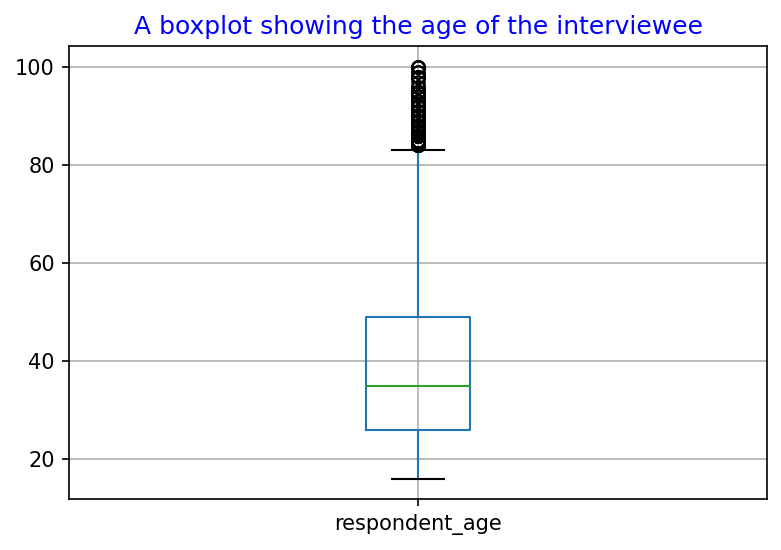

In [29]:
# Check for outliers on the variable (respondent_age) using boxplot
# This boxplot is created using pandas
# Give a title to the chart and display the chart
plt.figure(dpi = 150)
df.boxplot(['respondent_age'])
plt.title("A boxplot showing the age of the interviewee", color = 'blue')
plt.show()

In [37]:
# Pulling the rows from respondent_age column to see how the outliers look

df[df['respondent_age'] > 82.0]

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
209,Kenya,2018,No,Rural,No,3.0,95.0,Female,Parent,Widowed,No formal education,Informally employed
268,Kenya,2018,No,Urban,Yes,1.0,85.0,Female,Head of Household,Widowed,Primary education,Remittance Dependent
340,Kenya,2018,No,Rural,No,2.0,95.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
366,Kenya,2018,No,Rural,No,1.0,86.0,Female,Head of Household,Widowed,Primary education,Remittance Dependent
370,Kenya,2018,No,Rural,Yes,3.0,95.0,Male,Head of Household,Married/Living together,Primary education,Other Income
...,...,...,...,...,...,...,...,...,...,...,...,...
22995,Uganda,2018,No,Rural,No,4.0,95.0,Female,Spouse,Married/Living together,Primary education,No Income
23053,Uganda,2018,No,Urban,No,2.0,98.0,Female,Head of Household,Widowed,No formal education,No Income
23352,Uganda,2018,No,Rural,Yes,3.0,86.0,Male,Head of Household,Divorced/Seperated,No formal education,No Income
23395,Uganda,2018,No,Rural,No,2.0,85.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income


In [38]:
# Drop these respondent age outliers to prevent them from skewing our data
df.drop(df[df['respondent_age'] > 82.0].index, inplace = True)

In [39]:
# Check the new dataset
print(df.shape)

(22695, 12)


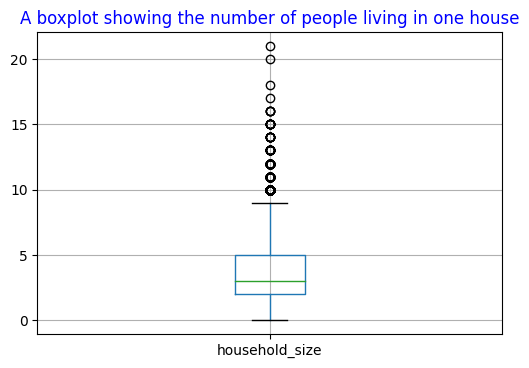

In [32]:
# Check for outliers on the variable (Household_size) using a boxplot
# This boxplot is created using pandas
# Give a title to the chart and display the chart

plt.figure(dpi=100)
df.boxplot(['household_size'])
plt.title("A boxplot showing the number of people living in one house", color = 'blue')
plt.show()

In [33]:
# Pulling rows from the household size column to see how the outliers look
# The total number of outliers in this column is 376 out of the total number of rows in our dataset which are 23,524 rows
# Drop these rows to prevent them from skewing our data

df[df['household_size'] > 9.0]

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
34,Kenya,2018,No,Rural,Yes,10.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
58,Kenya,2018,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
92,Kenya,2018,Yes,Urban,Yes,10.0,21.0,Female,Parent,Single/Never Married,Tertiary education,Remittance Dependent
100,Kenya,2018,No,Urban,Yes,10.0,23.0,Female,Other relative,Divorced/Seperated,Primary education,Formally employed Private
348,Kenya,2018,No,Urban,Yes,12.0,23.0,Female,Child,Single/Never Married,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23461,Uganda,2018,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23471,Uganda,2018,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23482,Uganda,2018,No,Rural,No,10.0,18.0,Female,Parent,Married/Living together,Secondary education,Self employed


In [34]:
# Drop the household outliers
df.drop(df[df['household_size'] > 9.0].index, inplace = True)

In [36]:
# Check the new dataset once the outliers are dropped
print(df.shape)

(22967, 12)


Anomalies

In [40]:
# The data report shows there is a problem with the year column
# The data description of the year column, the year the survey was done in, only includes 2016, 2017 and 2018
# Checking for anomalies
# Check the unique values of the year column
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [42]:
# Fix this anomaly by removing misentered years such as 2029, 2039 and 2056
anomalies = df[df['year']>2018].index
df.drop(anomalies, inplace=True)

# Check if anomalies are eliminated
df.year.unique()

array([2018, 2016, 2017])

**Exploratory Data Analysis**

**Univariate Analysis**

Univariate analysis is used to understand the data in the dataframe

Frequency Table

In [50]:
# Generate a frequency table of the number of people with a bank account

bank_accounts = pd.crosstab(index=df.has_a_bank_account, columns='count')
bank_accounts

# We can see that most respondents have a bank account from the output below

col_0,count
has_a_bank_account,
No,19459
Yes,3233


In [48]:
# Generate a frequency table of type of location and their value counts
location = pd.crosstab(index=df.type_of_location, columns='count')
location
#We can see that most respondents reside in the rural areas

col_0,count
type_of_location,
Rural,13781
Urban,8911


In [ ]:
# Generate a frequency table of type of cell phone access and their value counts
